In [1]:
import pandas as pd
data = pd.read_csv('tae_data.csv',delimiter=';')
df = pd.DataFrame(data)
df.style.hide_index()

ID,Whether TA,Course instructor,Course,Summer,Class size,Class attribute
1,english speaker,23,3,summer,19,high
2,non es,15,3,summer,17,high
3,english speaker,23,3,regular,49,high
4,english speaker,5,2,regular,33,high
5,non es,7,11,regular,55,high
6,non es,23,3,summer,20,high
7,non es,9,5,regular,19,high
8,non es,10,3,regular,27,high
9,english speaker,22,3,summer,58,high
10,non es,15,3,summer,20,high


In [9]:
def show_cluster(data,k):
    cluster = {}
    for i in range(k):
        cluster['Cluster ' + str(i)] = data[data["Cluster"].isin([i])].iloc[:,0].values
    dframe = pd.DataFrame.from_dict(cluster, orient='index')
    dframe = dframe.transpose()
    dframe = dframe.fillna("")
    return dframe.style.hide_index()

In [28]:
from kmodes.kprototypes import KPrototypes

k = 5
df_dummy = pd.get_dummies(df)
data_set = df_dummy.reset_index().values

kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2)
cluster = kproto.fit(data_set, categorical=[0, 1, 2, 3, 5])
data['Cluster'] = cluster.labels_

show_cluster(data,k)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 16, ncost: 5224.261957422524
Run: 1, iteration: 2/100, moves: 1, ncost: 5220.578223883416
Run: 1, iteration: 3/100, moves: 0, ncost: 5220.578223883416
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 12, ncost: 4084.3905745149927
Run: 2, iteration: 2/100, moves: 1, ncost: 4083.295920827783
Run: 2, iteration: 3/100, moves: 0, ncost: 4083.295920827783
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 8, ncost: 5078.691818718206
Run: 3, iteration: 2/100, moves: 2, ncost: 5070.048987076332
Run: 3, iteration: 3/100, moves: 3, ncost: 5061.87674125473
Run: 3, iteration: 4/100, moves: 0, ncost: 5061.87674125473
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 16, ncost: 5559.264716051194
Run: 4,

Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
4,1,3,14,11
8,2,5,15,17
12,6,9,16,19
13,7,18,20,26
21,10,31,25,34
23,22,38,28,50
30,24,42,29,56
33,27,44,35,58
43,32,48,36,65
47,37,57,39,73


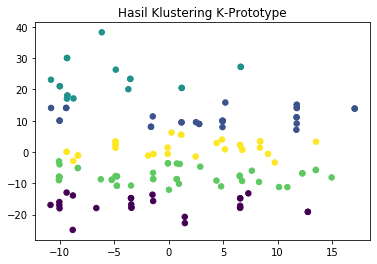

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(2)
# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dummy.iloc[:,1:])

# Plot based on the two dimensions, and shade by cluster label
plt.title("Hasil Klustering K-Prototype")
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["Cluster"], s=30)
plt.show()